In [1]:
import sys 
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path+"/python" not in sys.path:
    sys.path.append(module_path+"/python")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import observation as obs
import simulation as sim
from div import get_hetero, calculate_ints, location

In [2]:
pop_ts = sim.sim_one_population(
        pop_ind=100,
        seq_len=1e8,
        rec_rate=1e-8,
        mut_rate=1e-8,
        seed=1791095845
    )

pop_ts_diversity = pop_ts.diversity(span_normalise=False, windows='sites').mean()
pop_ts_hetero = get_hetero(pop_ts)
print('Population num sites is:', pop_ts.num_sites)
print('Population site diversity:', pop_ts_diversity)
print('Population heterozygosity:', pop_ts_hetero)

Population num sites is: 2434
Population site diversity: 0.16922810436735855
Population heterozygosity: 0.16377156943303203


In [3]:
#np.random.seed(1791095845)
obs_seeds = np.random.randint(0, 2 ** 32 - 1, size=10)#np.random.randint(0, 2 ** 32 - 1, size=(5, 10))[2, :]

num_ind = 50
max_sites = 600
num_obs = 10
confidence = 0.95
n_block = int(1e8 // 5e6)

position_div = np.zeros((num_obs, 15), dtype=int)
position_hetero = np.zeros((num_obs, 15), dtype=int)

div_sites_columns = ["bt", "jk_one", "jk_block"]
div_ind_columns = ["bt", "jk_one"]
het_sites_columns = ["bt", "jk_one", "jk_block"]
het_ind_columns = ["bt", "jk_one"]

In [16]:
def exp(num_ind, max_sites):
    obs_seeds = np.random.randint(0, 2 ** 32 - 1, size=10)
    intervals_sites_diversity = [[]] * 10
    intervals_ind_diversity = [[]] * 10
    intervals_sites_hetero = [[]] * 10
    intervals_ind_hetero = [[]] * 10
    
    for i in range(num_obs):
        obs_ts = obs.Div(pop_ts, num_ind, max_sites, seed=obs_seeds[i])
        obs_ts_diversity = obs_ts.div
        obs_ts_hetero = obs_ts.hetero

        # confidence intervals of resampling over sites for diversity
        intervals_sites_diversity[i] = calculate_ints([obs_ts.bootstrap_sites_diversity(),
                                                       obs_ts.jackknife_one_sites_diversity(),
                                                       obs_ts.jackknife_mj_sites_diversity(n_block)],
                                                      confidence, obs_ts_diversity)

        # confidence intervals of resampling over individuals for diversity
        intervals_ind_diversity[i] = calculate_ints([obs_ts.bootstrap_ind_diversity(),
                                                     obs_ts.jackknife_one_ind_diversity()],
                                                    confidence, obs_ts_diversity)

        # confidence intervals of resampling over sites for hetero
        intervals_sites_hetero[i] = calculate_ints([obs_ts.bootstrap_sites_hetero(),
                                                    obs_ts.jackknife_one_sites_hetero(),
                                                    obs_ts.jackknife_mj_sites_hetero(n_block)],
                                                   confidence, obs_ts_hetero)

        # confidence intervals of resampling over individuals for hetero
        intervals_ind_hetero[i] = calculate_ints([obs_ts.bootstrap_ind_hetero(),
                                                  obs_ts.jackknife_one_ind_hetero()],
                                                 confidence, obs_ts_hetero)
        
    return intervals_sites_diversity, intervals_ind_diversity, intervals_sites_hetero, intervals_ind_hetero

In [21]:
intervals_sites_diversity, intervals_ind_diversity, intervals_sites_hetero, intervals_ind_hetero = exp(num_ind=100, max_sites=50)

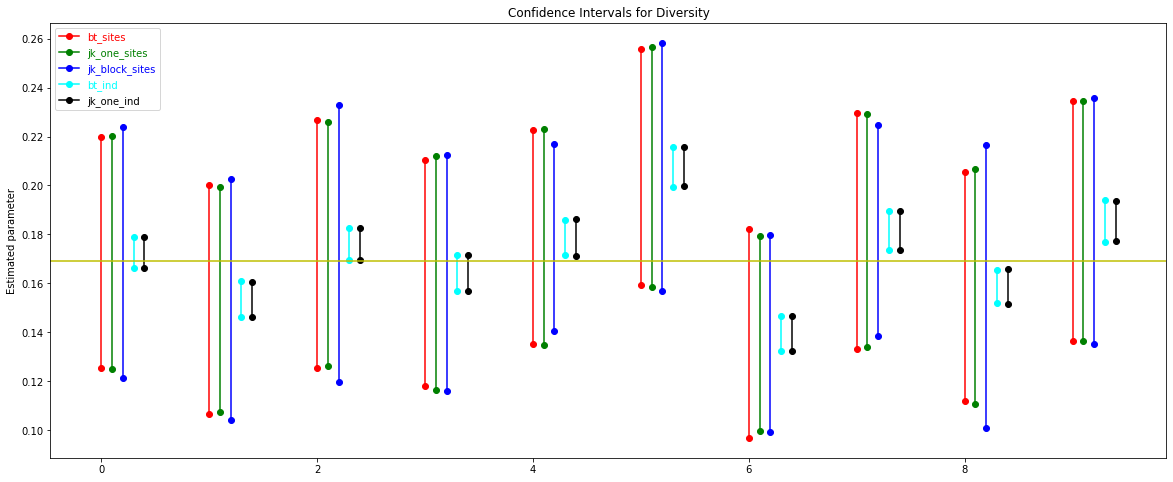

In [22]:
ci_plot(np.array(np.concatenate([intervals_sites_diversity, intervals_ind_diversity], axis=1)), pop_ts_diversity)

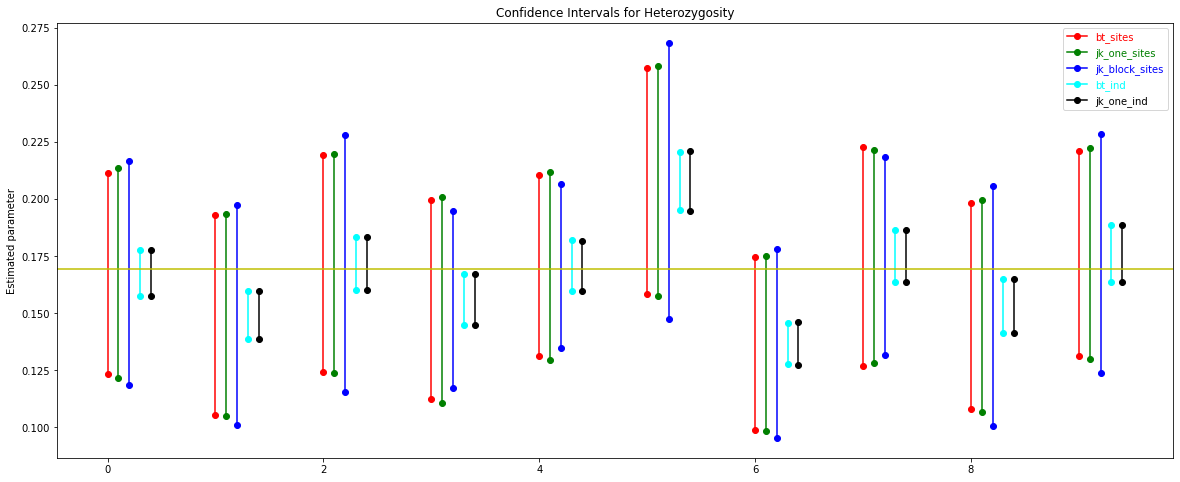

In [23]:
ci_plot(np.array(np.concatenate([intervals_sites_hetero, intervals_ind_hetero], axis=1)), 
        pop_ts_diversity, name='Heterozygosity')

In [5]:
exp(num_ind=50)

In [6]:
exp(num_ind=50, max_sites=50)

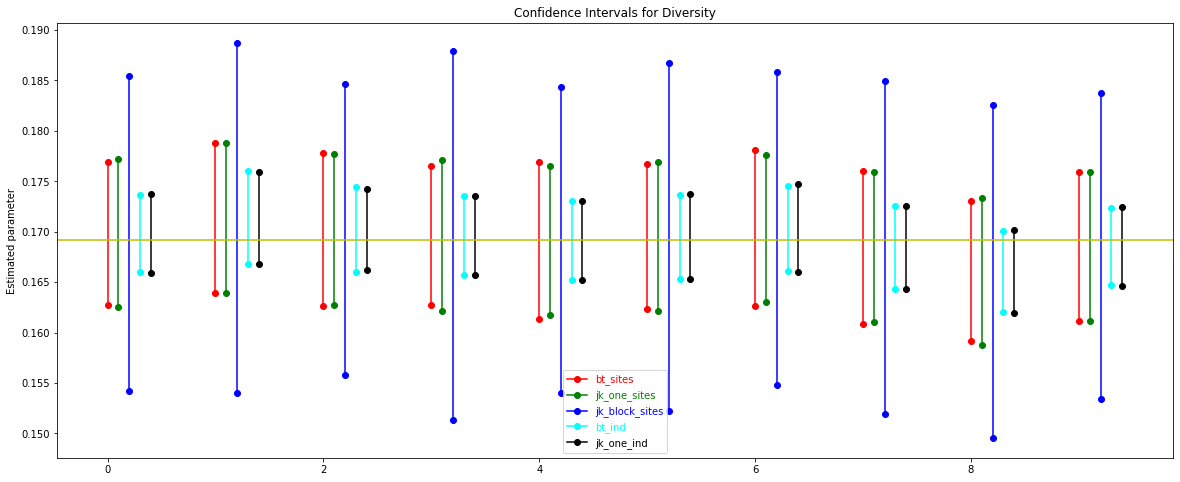

In [10]:
ci_plot(np.array(np.concatenate([intervals_sites_diversity, intervals_ind_diversity], axis=1)), pop_ts_diversity)

In [11]:
intervals_sites_diversity

[[(0.16272308362352061, 0.17693307799264102),
  (0.16248856657079347, 0.17716759504536816),
  (0.15424584819705733, 0.1854103134191043)],
 [(0.16392907969120626, 0.1788418293997028),
  (0.16397511939468054, 0.17879578969622853),
  (0.1540334327035024, 0.18873747638740668)],
 [(0.16262770204941304, 0.17785088380917283),
  (0.16277655985996392, 0.17770202599862195),
  (0.155790976167253, 0.18468760969133288)],
 [(0.16271377661895958, 0.17653248600730304),
  (0.16215976964963374, 0.17708649297662887),
  (0.1513245818826398, 0.1879216807436228)],
 [(0.16137458605760563, 0.17693288868986906),
  (0.16178315347943703, 0.17652432126803766),
  (0.1539982031595575, 0.18430927158791718)],
 [(0.1623300871454077, 0.1766687007333802),
  (0.16213149927994414, 0.17686728859884376),
  (0.1522582329504259, 0.186740554928362)],
 [(0.1625927919142391, 0.1780726626312154),
  (0.16301250932823277, 0.17765294521722172),
  (0.15480265498715984, 0.18586279955829466)],
 [(0.16087703917605342, 0.1760140719350577